In [2]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
import numpy as np
from random import randint
import PIL.Image
from cStringIO import StringIO
import IPython.display

In [3]:
X_train = genfromtxt('notMNIST_train_data.csv', delimiter=',')
y_train = genfromtxt('notMNIST_train_labels.csv', delimiter=',')
X_test = genfromtxt('notMNIST_test_data.csv', delimiter=',')
y_test = genfromtxt('notMNIST_test_labels.csv', delimiter=',')

In [4]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [20]:
#n = randint(1, 1000)
n=6
label = y_test[n]
im = X_test[n, :].reshape((28, 28))
print(label)
showarray(im)

1.0


In [7]:
#w=np.zeros(28*28)
#print np.shape(w)

from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',dual=False)
model.fit(X_train,y_train)
predicted1 = model.predict_log_proba(X_test)
model= LogisticRegression(penalty='l2', C=1.1,dual=True)
model.fit(X_train,y_train)
predicted2 = model.predict_log_proba(X_test)

p1=np.zeros(len(predicted1))
p2=np.zeros(len(predicted2))

for i in range(len(predicted1)):
        index=np.where(predicted1[i] == predicted1[i].max())
        asp= index[0]
        p1[i]=asp
for i in range(len(predicted2)):
        index=np.where(predicted2[i] == predicted2[i].max())
        asp= index[0]
        p2[i]=asp
#print p2-p1
#print p1
#p=np.asarray(p)
a1=metrics.accuracy_score(y_test, p1)                 
a2=metrics.accuracy_score(y_test, p2)
print a1
print a2
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted))


0.942170818505
0.938612099644


In [21]:


clf_l1 = LogisticRegression(C=100, penalty='l1')#, tol=0.01)
clf_l2 = LogisticRegression(C=100, penalty='l2') #, tol=0.01)
clf_l1.fit(X_train, y_train)
clf_l2.fit(X_train, y_train)
coef_l1 = clf_l1.coef_.ravel()
coef_l2 = clf_l2.coef_.ravel()
coef_l1c=coef_l1.reshape(28,28)
print np.shape(coef_l1c)
op=np.dot(coef_l1c,im)
showarray(op)

(28, 28)


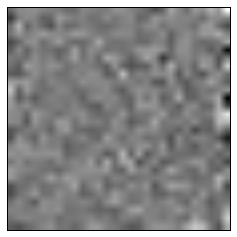

In [46]:
l1_plot = plt.subplot()
# print coef_l2_LR
l1_plot.imshow(coef_l1.reshape(28, 28),cmap=plt.get_cmap('gray'))#, vmax=1, vmin=0)
l1_plot.set_xticks(())
l1_plot.set_yticks(())	
plt.show()


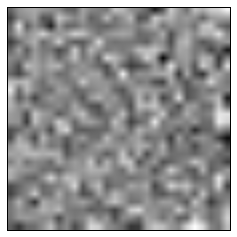

In [12]:
l2_plot = plt.subplot()
l2_plot.imshow(coef_l2.reshape(28, 28),cmap=plt.get_cmap('gray'))#, vmax=1, vmin=0)
l2_plot.set_xticks(())
l2_plot.set_yticks(())
plt.show()

(784,)
